In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('./data.csv')

In [4]:
pl=pd.read_csv('./players.csv')

In [12]:
data=df[['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'win_team']]
data = data.replace(0, np.nan)
data = data.dropna()
print(data)

      B365H  B365D  B365A   BWH   BWD    BWA   IWH  IWD   IWA   LBH  ...  \
7      1.95   3.50   3.75  1.95  3.60   3.60  2.00  3.3   3.3  2.00  ...   
24     2.00   3.50   3.60  2.00  3.50   3.60  2.00  3.5   3.4  2.15  ...   
61     1.29   5.50  10.00  1.25  5.75  10.50  1.30  5.0   9.0  1.30  ...   
70     2.30   3.20   3.10  2.35  3.25   3.00  2.10  3.3   3.3  2.25  ...   
91     1.67   3.75   5.00  1.62  3.75   4.60  1.60  3.6   4.8  1.62  ...   
...     ...    ...    ...   ...   ...    ...   ...  ...   ...   ...  ...   
8717   1.18   7.00  13.00  1.19  6.75  13.00  1.22  6.0  10.5  1.22  ...   
8742   1.67   3.75   5.00  1.75  3.90   4.75  1.60  3.6   4.8  1.62  ...   
8746   1.20   6.50  13.00  1.18  6.00  15.00  1.17  5.4  13.0  1.20  ...   
8752   1.70   3.75   4.75  1.70  3.50   4.40  1.65  3.5   4.5  1.61  ...   
8772   2.60   3.30   2.63  2.55  3.20   2.55  2.50  3.1   2.6  2.37  ...   

       VCH   VCD    VCA   GBH   GBD    GBA   BSH   BSD    BSA  win_team  
7     1.95  3

In [16]:
y= data['win_team'].astype(int)

In [17]:
X= data.drop('win_team',axis=1)

In [18]:
X.shape,y.shape

((640, 30), (640,))

Настроим параметры кросс-валидации К=5

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,random_state=17)

In [29]:
X_train.shape # 8786*4/5 

(512, 30)

In [30]:
first_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=17) # создадим первое дерево (и наверное единственное) entropy

In [31]:
np.mean(cross_val_score (first_tree, X_train, y_train, cv=5)) # средний результат работы дерева на кросс-валидации

1.0

Подберем  оптимальные гиперпараметры дерева решений

In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
tree_params = {'max_depth':np.arange(1,11), 'max_features':np.arange(0.5,1,0.1)}

In [34]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5)


In [35]:
%time
tree_grid.fit(X_train,y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=17),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([0.5, 0.6, 0.7, 0.8, 0.9])})

Лучший результат дерева на кросс валидации

In [36]:
tree_grid.best_score_ , tree_grid.best_params_ # tree_grid.best_estimator_

(1.0, {'max_depth': 1, 'max_features': 0.5})

Узнаем результаты на отложенной выборке

In [38]:
tree_grid.score(X_test, y_test)

1.0

Выбранная метрика - доля верных прогнозов для данной модели составляет 71%

ВИЗУАЛИЗИРУЕМ ДЕРЕВО

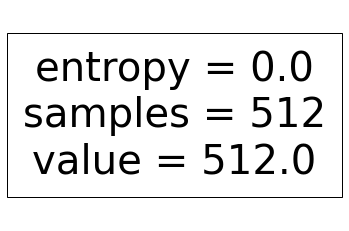

In [40]:
from graphviz import Source
from sklearn import tree
tree.plot_tree(tree_grid.best_estimator_);